In [5]:
import numpy as np
import cv2
import time
import os

cam = cv2.VideoCapture(1)

i = 0

while(True):
    success, frame = cam.read()
    
    if (success == False):
        print("Cannot read frame")
        
        break
    
    frame = cv2.rotate(frame,cv2.ROTATE_180)

    key = cv2.waitKey(20) & 0xFF
    
    if (key == ord('q')):
        break
    
    elif (key == 32): #space
        cv2.imwrite("calib/" + str(i) + ".jpg", frame)
        i += 1
    
    cv2.imshow("frame", frame)

cam.release()
cv2.destroyAllWindows()
cv2.waitKey(10)

-1

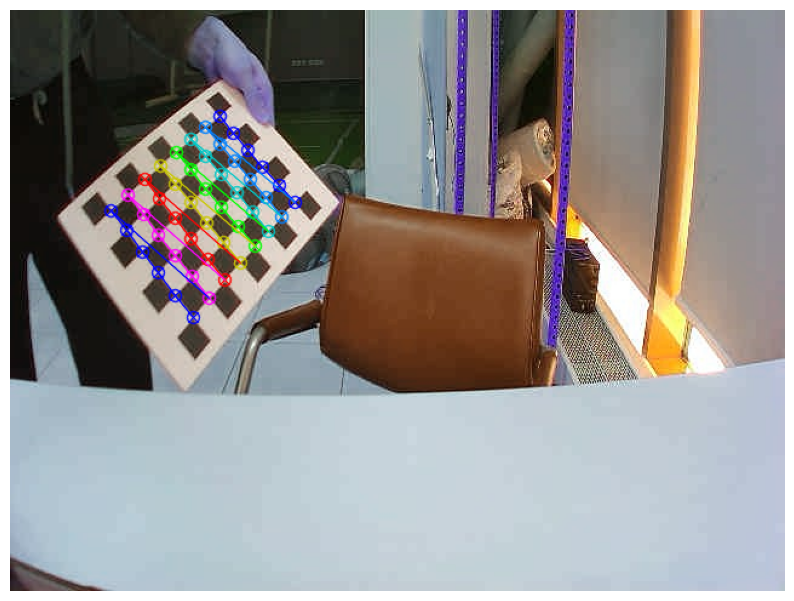

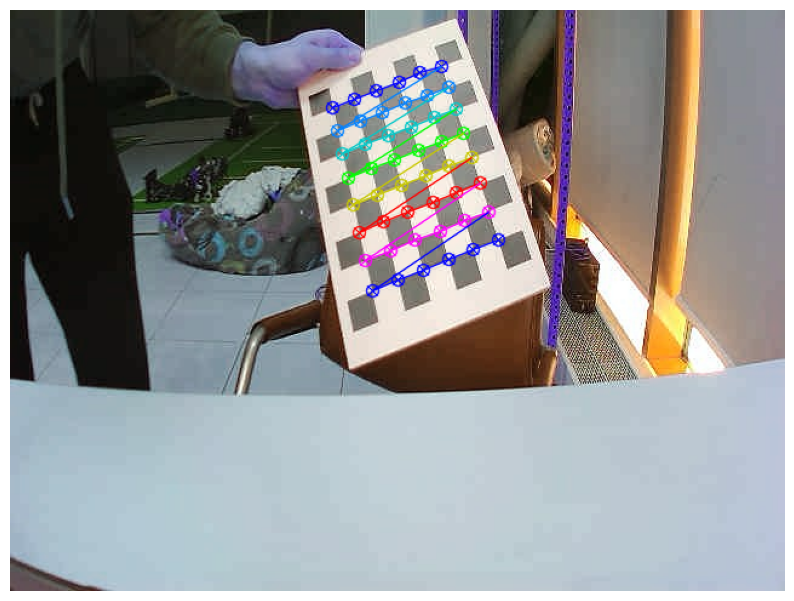

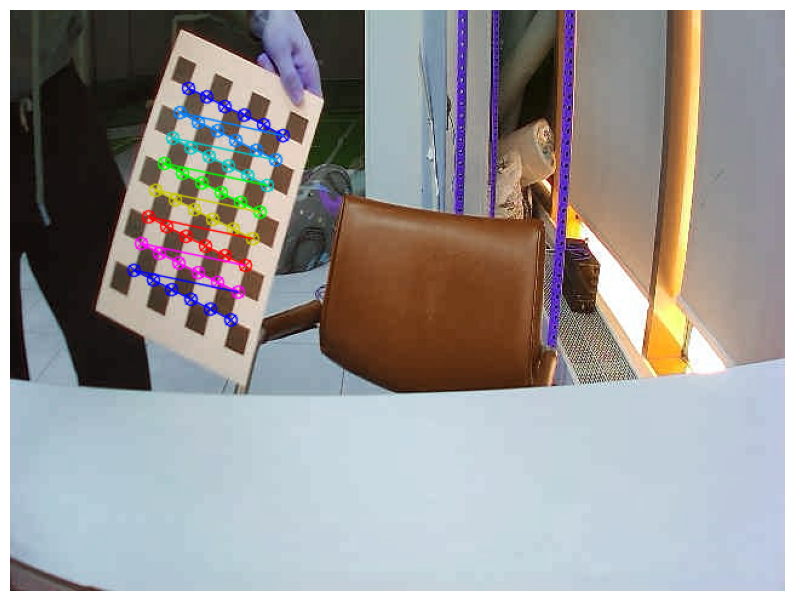

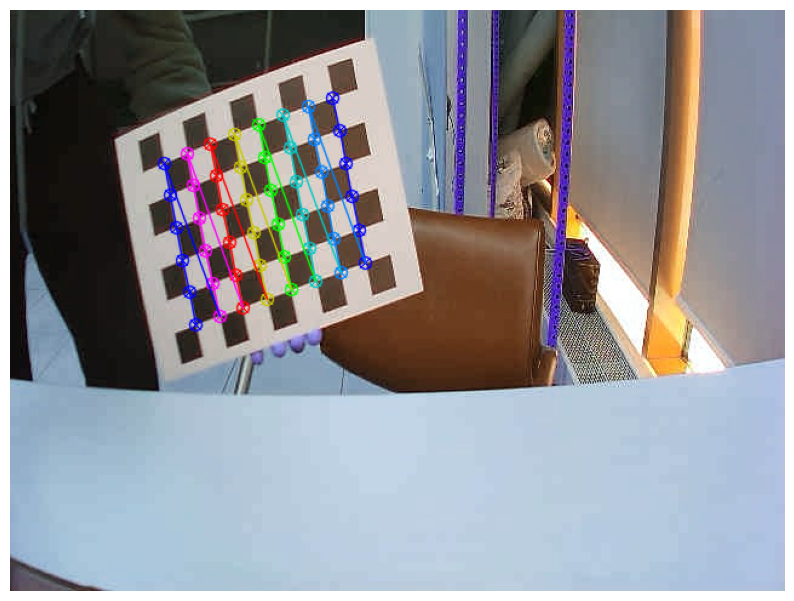

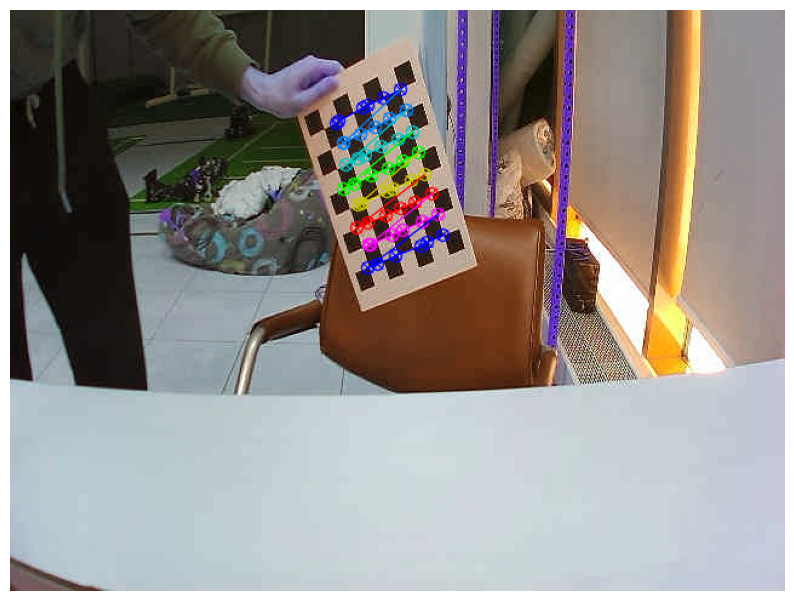

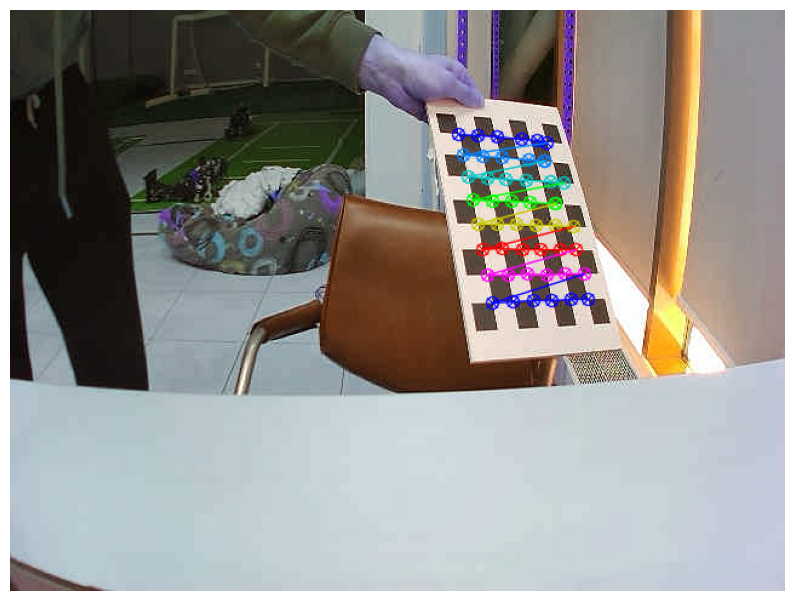

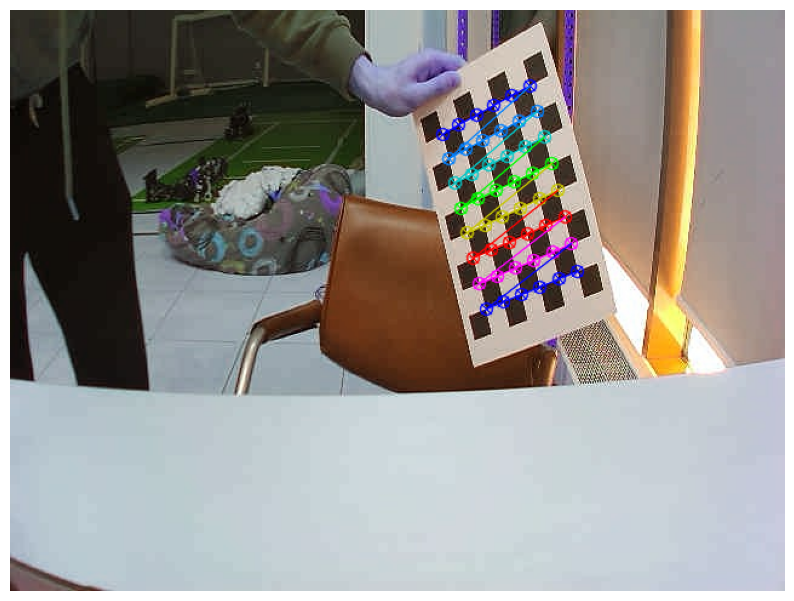

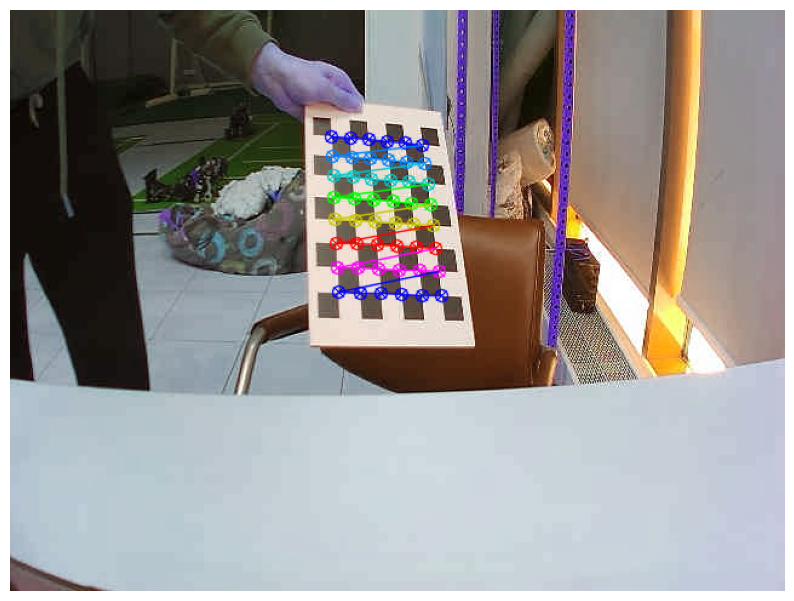

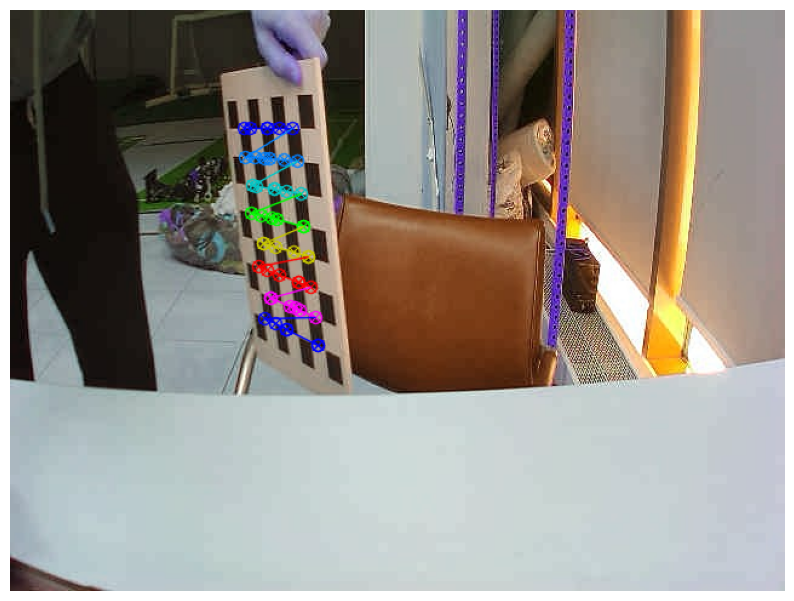

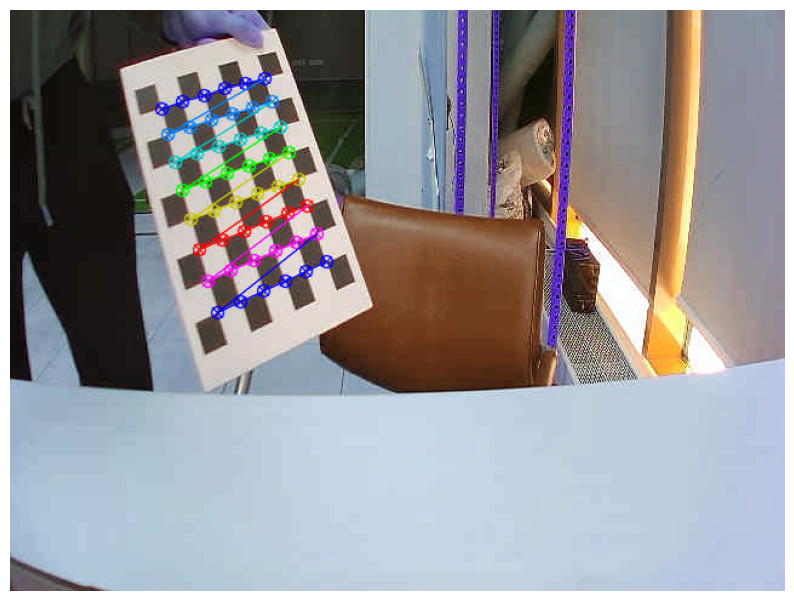

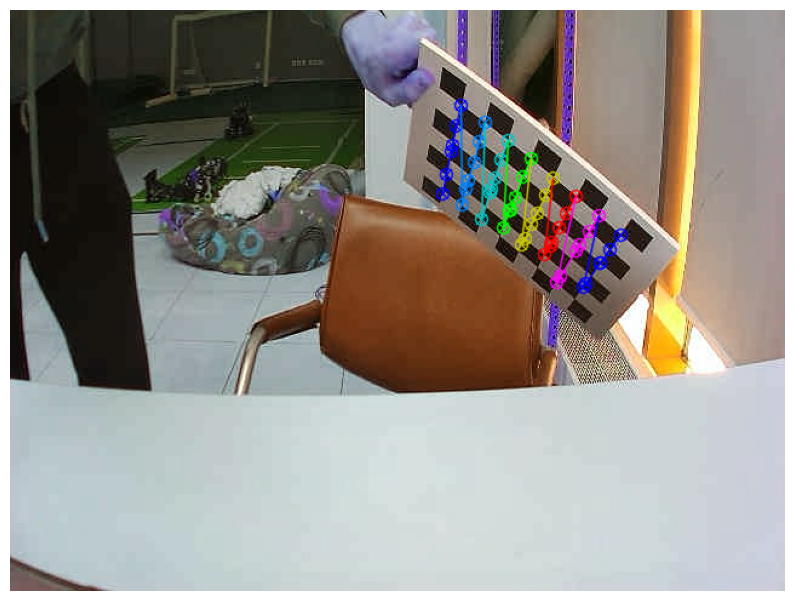

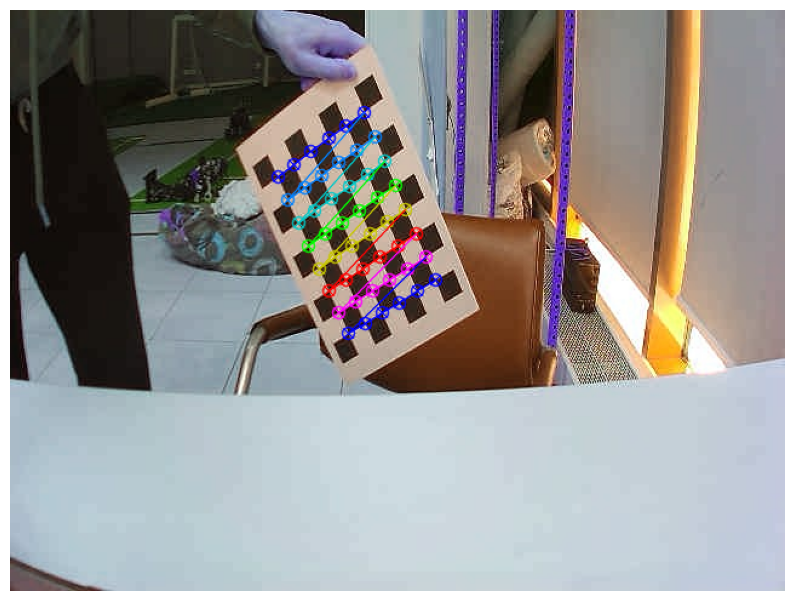

In [6]:
import numpy as np
import cv2
import glob
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)

# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((8*6,3), np.float32)
objp[:,:2] = np.mgrid[0:6,0:8].T.reshape(-1,2) * 0.027

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

images = glob.glob('calib/*.jpg')
#images = glob.glob('calib_fira2024/*.jpg')

for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chess board corners
    
    ret, corners = cv2.findChessboardCorners(gray, (6, 8),None)
    #for fisheye
    #ret, corners = cv2.findChessboardCorners(i, (7, 9),None)

    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)

        corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        imgpoints.append(corners2)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (6, 8), corners2,ret)
        
        plt.imshow (img)
        plt.axis ('off')
        plt.show ()
        #cv2.imshow('img',img)
        
        cv2.waitKey(50)

cv2.destroyAllWindows()

In [7]:
import cv2

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints,
                gray.shape[::-1],None,None)#, flags=cv2.CALIB_TILTED_MODEL)

print("ret", ret)

print("\nmtx", mtx)

print("\ndist", dist)

print("\nrvecs")

for i in range(7):
    print(rvecs[i])
    print("")

print("\ntvecs")

for i in range(7):
    print(tvecs[i])
    print("")

ret 2.080723430143967

mtx [[471.43237009   0.         315.85664909]
 [  0.         631.69807911 211.38326907]
 [  0.           0.           1.        ]]

dist [[-0.20160244 -0.9979554   0.00325022 -0.0072171   2.11794808]]

rvecs
[[-0.7662593 ]
 [-0.26782794]
 [ 0.66905264]]

[[-0.49670614]
 [ 0.05770311]
 [-0.29138547]]

[[-0.09734013]
 [-0.24891019]
 [ 0.34474719]]

[[ 0.00547575]
 [-0.11233142]
 [ 1.30804254]]

[[ 0.21321346]
 [ 0.39451755]
 [-0.32418649]]

[[-0.55003771]
 [-0.2220422 ]
 [-0.0653977 ]]

[[ 0.03623133]
 [ 0.52216001]
 [-0.31809023]]


tvecs
[[-0.2270375 ]
 [-0.14686393]
 [ 0.7190726 ]]

[[-0.07071114]
 [-0.13979703]
 [ 0.66660091]]

[[-0.26615306]
 [-0.17371086]
 [ 0.70033093]]

[[-0.06317311]
 [-0.13223077]
 [ 0.59231436]]

[[-0.10593653]
 [-0.17359557]
 [ 0.94834735]]

[[ 0.09033596]
 [-0.12998967]
 [ 0.7453432 ]]

[[ 0.06833464]
 [-0.13595178]
 [ 0.77985431]]



In [ ]:
import numpy as np
import math

# A - matrix of intrinsic parameters (mtx)
# a - angle of rotation of the camera around vertical axis
# b - inclination angle of the camera
# x, y - coordinates of the object in the picture
# h - height of the camera above the ground

def pic2r(A, alpha, beta, x, y, h):
    f_x = A[0][0]
    c_x = A[0][2]
    f_y = A[1][1]
    c_y = A[1][2]
    y_w = h* 1/(math.tan(math.atan((y - c_y)/f_y + beta)))
    x_w = math.sqrt(y_w**2 + h**2)* ((x-c_x)/f_x)


    return x_w, y_w



A = np.array([[471.43237009,   0.         ,315.85664909],
            [  0.,         631.69807911,  211.38326907],
            [  0.,           0.,           1.,       ]])

dist = np.array([[-0.20160244, -0.9979554,   0.00325022, -0.0072171,   2.11794808]])

#print(pic2r(A, 0.3, 0.45, 10, 30, 10))

import numpy as np
import cv2

def nothing(i):
    pass


cv2.namedWindow('mask1')

cam = cv2.VideoCapture(1)
cv2.createTrackbar('low_blue', 'mask1', 0,255, nothing)
cv2.createTrackbar('low_green', 'mask1', 0,255, nothing)
cv2.createTrackbar('low_red', 'mask1', 0,255, nothing)
cv2.createTrackbar('high_blue', 'mask1', 0,255, nothing)
cv2.createTrackbar('high_green', 'mask1', 0,255, nothing)
cv2.createTrackbar('high_red', 'mask1', 0,255, nothing)



x, y = 0, 0

while(True):
    success, frame = cam.read()
    
    if (success == False):
        print("Cannot read frame. Exiting")
        break
    
    low_blue = cv2.getTrackbarPos('low_blue', 'mask1')
    low_green = cv2.getTrackbarPos('low_green', 'mask1')
    low_red = cv2.getTrackbarPos('low_red', 'mask1')
    high_blue = cv2.getTrackbarPos('high_blue', 'mask1')
    high_green = cv2.getTrackbarPos('high_green', 'mask1')
    high_red = cv2.getTrackbarPos('high_red', 'mask1')




    blurred = cv2.blur(frame, (7, 7))
    hsv = cv2.cvtColor(blurred, cv2.COLOR_BGR2HSV)
    
    mask = cv2.inRange(hsv, (low_blue, low_green, low_red), (high_blue, high_green, high_red))
    
    cv2.imshow("mask1", mask)
    
    connectivity = 4
    output = cv2.connectedComponentsWithStats(mask, connectivity, cv2.CV_32S)
    
    num_labels = output[0]
    labels = output[1]
    stats = output[2]
    
    filtered = np.zeros_like(mask)
    
    obj_h = 0
    
    for i in range(1, num_labels):
        a = stats[i, cv2.CC_STAT_AREA]
        t = stats[i, cv2.CC_STAT_TOP]
        l = stats[i, cv2.CC_STAT_LEFT]
        w = stats[i, cv2.CC_STAT_WIDTH]
        h = stats[i, cv2.CC_STAT_HEIGHT]
        
        if (a >= 4500):
            cv2.rectangle(frame, (l, t), (l + w, t + h), (123, 223, 134), 3)
            
            x = l + w // 2
            y = t + h
            
            break
    
    xr, yr = pic2r(A, 0, (90 - 17) / 180 * math.pi, x, y, 24)
    
    image = cv2.putText(frame, str(xr)[:5] + " " + str(yr)[:5], (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 
                           1.5, (255, 255, 0), 1, cv2.LINE_AA)
    
    cv2.imshow("frame", frame)

    key = cv2.waitKey(90) & 0xFF
        
    if (key == ord('q')):
        break

cam.release()
cv2.destroyAllWindows()
cv2.waitKey(10)

-1